#**TUGAS PRAKTIKUM MANDIRI 6 - MACHINE LEARNING (SVM)**

Nama : Imelda Wahyuni

Nim : 011022042

Sesi : Pagi

#**PENJELASAN DATASET**

Kumpulan data ini dapat berguna untuk prakiraan cuaca, analisis pola curah hujan, atau memahami hubungan antara berbagai variabel meteorologi dan kondisi cuaca.

Berisi kolom-kolom berikut:
- tanggal
- curah hujan
- suhu
- kelembapan
- kecepatan angin
- kondisi cuaca

Link Dataset : https://www.kaggle.com/datasets/sujithmandala/simple-rainfall-classification-dataset/data

#**1. Import Library**

In [ ]:
# Import pustaka yang diperluka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
import joblib
import os

Menyiapkan semua library yang dibutuhkan untuk analisis dan pemodelan SVM.

Tiap pustaka punya fungsi berbeda:

- pandas, numpy → manipulasi dan analisis data.

- matplotlib, seaborn, Axes3D → visualisasi grafik 2D & 3D.

- sklearn.model_selection → membagi data & melakukan tuning model.

- LabelEncoder, StandardScaler → praproses data (encoding & normalisasi).

- SVC, SVR → algoritma Support Vector Machine untuk klasifikasi & regresi.

- sklearn.metrics → evaluasi performa model.

- joblib, os → menyimpan model dan mengelola file.

Kode di bawah ini untuk menghubungkan colab dengan drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#**2. Loading Dataset**

#**Membaca File CSV**

Selanjutnya, kode menggunakan library Pandas untuk membaca data dari file. Variabel path berisi lokasi folder di Google Drive tempat file rainfall.csv disimpan. Lalu, fungsi pd.read_csv() dipakai untuk membaca file CSV tersebut dan menyimpannya ke dalam DataFrame, sehingga datanya bisa diproses lebih lanjut.

In [ ]:
# Membaca file csv menggunakan pandas
df = pd.read_csv("/content/gdrive/MyDrive/SEMESTER 7/Machine Learning/praktikum06/data/rainfall.csv")
df

,date,rainfall,temperature,humidity,wind_speed,weather_condition
0,2022-01-01,12.5,15.2,78.0,8.5,Rainy
1,2022-01-02,8.2,17.8,65.0,5.2,Rainy
2,2022-01-03,0.0,20.1,52.0,3.1,Sunny
3,2022-01-04,3.7,18.6,71.0,6.7,Rainy
4,2022-01-05,21.1,14.8,82.0,9.3,Rainy
5,2022-01-06,15.3,16.5,75.0,7.8,Rainy
6,2022-01-07,6.8,19.2,61.0,4.5,Rainy
7,2022-01-08,0.0,21.7,48.0,2.9,Sunny
8,2022-01-09,11.2,17.3,73.0,6.1,Rainy
9,2022-01-10,18.6,15.8,79.0,8.9,Rainy


Terdapat 53 baris dan 6 kolom pada dataset rainfall tersebut.

#**Menampilkan informasi detail dengan df.info()**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               54 non-null     object 
 1   rainfall           53 non-null     float64
 2   temperature        53 non-null     float64
 3   humidity           53 non-null     float64
 4   wind_speed         53 non-null     float64
 5   weather_condition  53 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.7+ KB


Terdapat 2 type data dari 6 kolom, float (4), dan object (2)

#**Melihat statistik deskriptif**

In [ ]:
df.describe()

,rainfall,temperature,humidity,wind_speed,WeatherEncoded
count,53.000000,53.000000,53.000000,53.000000,53.000000
mean,9.049057,17.950943,69.245283,6.403774,0.207547
std,6.712521,2.500663,11.969361,2.209069,0.409432
min,0.000000,13.900000,44.000000,2.100000,0.000000
25%,3.900000,16.100000,62.000000,4.700000,0.000000
50%,8.300000,17.800000,72.000000,6.700000,0.000000
75%,14.800000,19.400000,78.000000,8.300000,0.000000
max,21.800000,23.400000,89.000000,10.500000,1.000000


Menampilkan statistik deskriptif dari setiap kolom numerik di DataFrame df, meliputi:

- count → jumlah data (53 baris valid).

- mean → nilai rata-rata tiap kolom.

- std → standar deviasi (tingkat variasi data).

- min, max → nilai terkecil dan terbesar.

- 25%, 50%, 75% → kuartil data (distribusi nilai).

Kode di aatas memberi gambaran umum tentang sebaran dan karakteristik data, seperti rata-rata suhu, curah hujan, kelembapan, kecepatan angin, serta proporsi kelas cuaca (WeatherEncoded).

#**3. Data Preprocessing**

#**Mengecek Nilai Missing Value/Data Kotor**

In [ ]:
df.isnull().sum()

,0
date,0
rainfall,1
temperature,1
humidity,1
wind_speed,1
weather_condition,1


Terdapat nilai missing value pada 5 kolom yang jumlahnya hanya 1 saja di setiap kolomnya, maka perlu dilakukan pembersihan data untuk mempermudah dalam pengolahan datanya.

#**Menghapus Nilai Missing Value**

In [ ]:
df = df.dropna()
df

,date,rainfall,temperature,humidity,wind_speed,weather_condition
0,2022-01-01,12.5,15.2,78.0,8.5,Rainy
1,2022-01-02,8.2,17.8,65.0,5.2,Rainy
2,2022-01-03,0.0,20.1,52.0,3.1,Sunny
3,2022-01-04,3.7,18.6,71.0,6.7,Rainy
4,2022-01-05,21.1,14.8,82.0,9.3,Rainy
5,2022-01-06,15.3,16.5,75.0,7.8,Rainy
6,2022-01-07,6.8,19.2,61.0,4.5,Rainy
7,2022-01-08,0.0,21.7,48.0,2.9,Sunny
8,2022-01-09,11.2,17.3,73.0,6.1,Rainy
9,2022-01-10,18.6,15.8,79.0,8.9,Rainy


Menggunakan kolom drop.na itu hanya menghapus 1 baris saja, di baris ke 53 saja, karena missing value nya hanya ada di baris itu saja.

#**Mengecek Ulang Missing Value**

In [ ]:
df.isnull().sum()

,0
date,0
rainfall,0
temperature,0
humidity,0
wind_speed,0
weather_condition,0


Mengecek kembali menggunakan kode yang sama, hasilnya sekarang sudah 0 semua, artinya data yang ada pada setiap kolom di dataset rainfall sudah bersih dan sudah bisa diolah datanya.

#**Mengecek Nilai Unik Pada Kolom weater_condition**

In [ ]:
df["weather_condition"].unique()

array(['Rainy', 'Sunny'], dtype=object)

Menampilkan daftar nilai unik dari kolom weather_condition, yaitu hanya ada dua kondisi cuaca: ‘Rainy’ dan ‘Sunny’. Kolom ini berisi dua kategori utama yang akan dijadikan label target dalam klasifikasi SVM.

In [ ]:
df["weather_condition"].value_counts()

,count
weather_condition,
Rainy,42
Sunny,11


Menampilkan jumlah kemunculan tiap kategori dalam kolom weather_condition Terdapat 42 hari Rainy dan 11 hari Sunny, sehingga dataset bersifat tidak seimbang (imbalanced) karena data hujan lebih banyak daripada cerah.

#**4. Pemilihan Fitur**

In [ ]:
X = df[['rainfall', 'temperature', 'humidity', 'wind_speed']]

# Kolom target (label)
y = df['weather_condition']

- X menyimpan fitur (variabel input) berupa empat kolom numerik: rainfall, temperature, humidity, dan wind_speed.

- y menyimpan target (label output) yaitu kolom weather_condition yang berisi kategori cuaca Rainy atau Sunny.

Tujuannya untuk memisahkan data input dan output sebelum melatih model SVM.

Kode dibawah digunakan untuk mengecek isi data fitur yang akan menjadi input model SVM, memastikan bahwa kolom dan nilainya sudah benar sebelum proses pelatihan.

In [ ]:
X.head()

,rainfall,temperature,humidity,wind_speed
0,12.5,15.2,78.0,8.5
1,8.2,17.8,65.0,5.2
2,0.0,20.1,52.0,3.1
3,3.7,18.6,71.0,6.7
4,21.1,14.8,82.0,9.3


Menampilkan 5 baris pertama dari DataFrame X, yang berisi kolom fitur:
rainfall, temperature, humidity, dan wind_speed.

Kode dibawah digunakan untuk memeriksa label target yang akan diprediksi oleh model SVM, memastikan data keluaran (kelas cuaca) sudah benar.

In [ ]:
y.head()

,weather_condition
0,Rainy
1,Rainy
2,Sunny
3,Rainy
4,Rainy


Menampilkan 5 baris pertama dari variabel y, yaitu kolom weather_condition dengan nilai Rainy dan Sunny.

#**5. Split dan Bangun Model SVM**

Kode dibawah melakukan beberapa langkah utama:

- train_test_split() → membagi data menjadi 80% training dan 20% testing.

- SVC(kernel='linear') → membuat model Support Vector Machine (SVM) dengan kernel linear.

- model.fit(X_train, y_train) → melatih model menggunakan data training.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Membuat model SVM dengan kernel linear
model = SVC(kernel='linear') # kernel ini bisa pake 'polly', 'sigmoid' dll

# Melatih model dengan data pelatihan
model.fit(X_train, y_train)

SVC(kernel='linear')

Hasil dari split dan bangun model SVM di atas yaitu terbentuk objek model SVM terlatih (model) yang sudah mempelajari pola antara fitur (X_train) dan target (y_train) untuk digunakan pada tahap prediksi selanjutnya.

#**6. Evaluasi Akurasi dan Report Klasifikasi**

- model.predict(X_test) → menggunakan model SVM yang sudah dilatih untuk memprediksi kondisi cuaca pada data uji.

- accuracy_score(y_test, y_pred) → menghitung persentase prediksi yang benar dibandingkan label aslinya.

- classification_report(y_test, y_pred) → menampilkan detail evaluasi model seperti precision, recall, f1-score, dan jumlah data (support).

In [ ]:
y_pred = model.predict (X_test)

# Akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 100.00%

Laporan Klasifikasi:
               precision    recall  f1-score   support

       Rainy       1.00      1.00      1.00         8
       Sunny       1.00      1.00      1.00         3

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



Model SVM berhasil memprediksi semua data dengan benar (akurasi 100%), di mana setiap kelas (Rainy dan Sunny) memiliki nilai precision, recall, dan f1-score sempurna (1.00).

#**7. Confusion Matrix**

Untuk melihat hasil confusion matrix, tentu dilakukan beberapa tahapan :

- confusion_matrix(y_test, y_pred) → membuat tabel perbandingan antara label asli dan hasil prediksi model.

- sns.heatmap() → menampilkan tabel tersebut dalam bentuk peta warna (heatmap) agar lebih mudah dibaca.

Label sumbu:

- Actual = data sebenarnya.

- Predicted = hasil prediksi model.

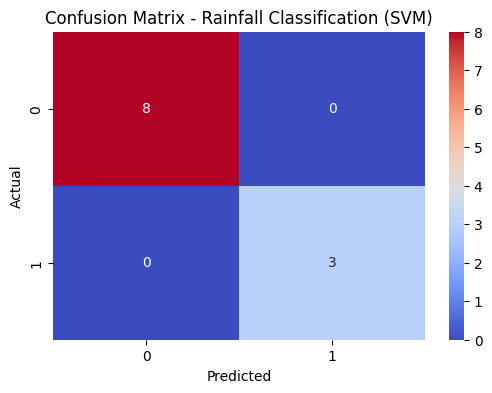

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Rainfall Classification (SVM)')
plt.show()


Hasil dari Confusion Matrix di atas yaitu :
- Nilai diagonal (8 dan 3) menunjukkan prediksi benar untuk kelas Rainy dan Sunny.
- Tidak ada nilai di luar diagonal → model 100% akurat, semua data uji diklasifikasikan dengan benar.



#**8. Visualisasi Hasil Model SVM**

Kode di bawah membuat scatter plot hubungan antara temperatur dan kelembapan berdasarkan kondisi cuaca:

- plt.scatter() → menampilkan titik data dengan warna berbeda sesuai WeatherEncoded (Rainy/Sunny).

- mpatches.Patch() → menambahkan legenda warna secara manual.

- Label sumbu dan judul ditambahkan untuk memperjelas isi grafik.

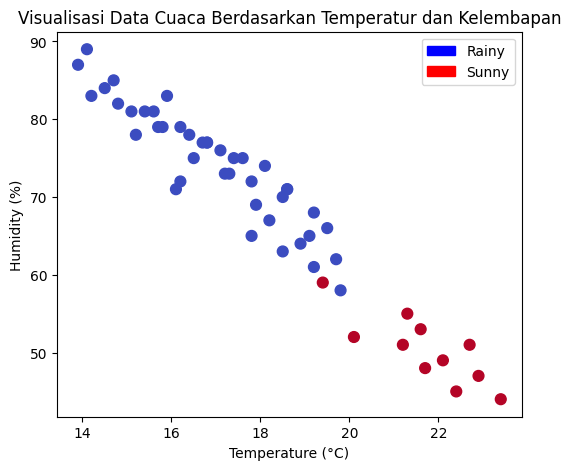

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df['temperature'], df['humidity'],
            c=df['WeatherEncoded'], cmap='coolwarm', s=60)

plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Visualisasi Data Cuaca Berdasarkan Temperatur dan Kelembapan')

# Tambahkan legend manual
import matplotlib.patches as mpatches
rainy_patch = mpatches.Patch(color='blue', label='Rainy')
sunny_patch = mpatches.Patch(color='red', label='Sunny')
plt.legend(handles=[rainy_patch, sunny_patch])
plt.show()

Grafik menampilkan hubungan antara temperatur dan kelembapan pada data cuaca:

- Titik biru (Rainy) cenderung berada di sisi kiri atas grafik — artinya cuaca hujan terjadi saat suhu rendah dan kelembapan tinggi.

- Titik merah (Sunny) lebih banyak di kanan bawah — menunjukkan cuaca cerah terjadi saat suhu tinggi dan kelembapan rendah.

- Pola sebaran titik membentuk tren menurun (negatif): semakin tinggi suhu, kelembapan udara semakin menurun.

Secara visual, grafik ini menunjukkan bahwa model SVM dapat memisahkan dua kelas cuaca dengan cukup jelas, karena kelompok Rainy dan Sunny membentuk dua area berbeda di bidang suhu–kelembapan.
Visualisasi ini membantu memahami pola dasar dalam dataset sebelum atau sesudah dilakukan klasifikasi dengan SVM.

#**9. 3D Visualisasi Hasil Model SVM**

Kode di bawah digunakan untuk membuat visualisasi 3D (tiga dimensi) dari data cuaca menggunakan tiga fitur utama:

- Temperature (°C) → sumbu X

- Humidity (%) → sumbu Y

- Rainfall (mm) → sumbu Z

Langkah-langkah yang dilakukan:

- plt.figure() dan projection='3d' → membuat area plot tiga dimensi.

- colors = ['blue', 'red'] → menentukan warna titik untuk tiap kelas (Rainy = biru, Sunny = merah).

- Loop for digunakan untuk menggambar titik data berdasarkan label (WeatherEncoded).

- ax.scatter() menampilkan setiap titik pada ruang 3D dengan posisi berdasarkan tiga variabel cuaca.

- ax.legend() menampilkan keterangan warna untuk masing-masing kondisi cuaca.

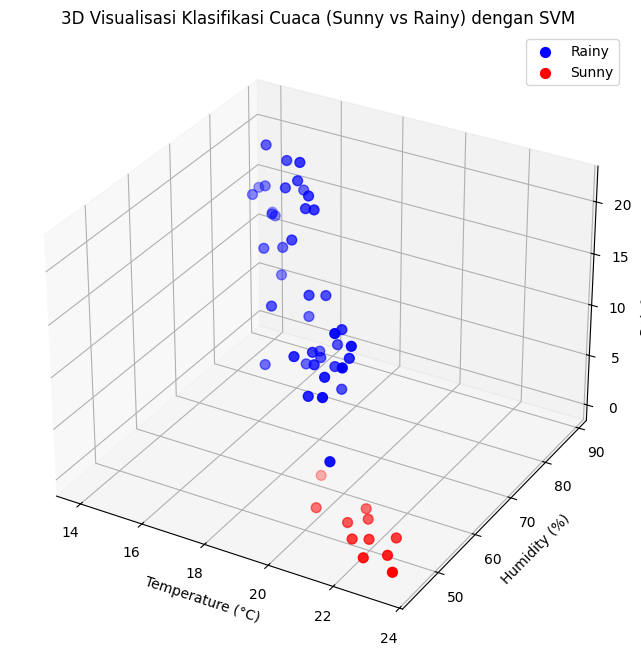

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'red']  # Sunny = orange, Rainy = blue
labels = le.classes_

for i, weather in enumerate(labels):
    subset = df[df['WeatherEncoded'] == i]
    ax.scatter(
        subset['temperature'],
        subset['humidity'],
        subset['rainfall'],
        color=colors[i],
        label=weather,
        s=50
    )

ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Rainfall (mm)')
ax.set_title('3D Visualisasi Klasifikasi Cuaca (Sunny vs Rainy) dengan SVM')
ax.legend()
plt.show()

Hasil dari grafik di atas yaitu :
- Titik biru mewakili data dengan kondisi Rainy, sedangkan titik merah mewakili Sunny.
- Titik-titik biru tampak berkelompok pada area dengan:
Suhu lebih rendah
  - Suhu lebih rendah
  - Kelembapan lebih tinggi
  - Curah hujan lebih besar

- Titik-titik merah muncul pada:
  - Suhu lebih tinggi
  - Kelembapan lebih rendah
  - Curah hujan lebih kecil

Dari grafik terlihat adanya pemisahan yang jelas antara dua kelompok data, menunjukkan bahwa variabel temperature, humidity, dan rainfall memiliki hubungan kuat dalam membedakan cuaca Rainy dan Sunny.

#**Kesimpulan Hasil Implementasi Model SVM**

Berdasarkan hasil implementasi algoritma Support Vector Machine (SVM) pada dataset rainfall, diperoleh bahwa model mampu melakukan klasifikasi kondisi cuaca dengan sangat baik. Setelah melalui tahap pembersihan data dan pengkodean label target (Rainy dan Sunny), model SVM dengan kernel linear menghasilkan akurasi sebesar 100%, dengan nilai precision, recall, dan f1-score sempurna pada kedua kelas. Hasil ini juga diperkuat oleh confusion matrix yang menunjukkan seluruh data uji terklasifikasi dengan benar. Visualisasi 2D dan 3D memperlihatkan pemisahan yang jelas antara data Rainy dan Sunny, di mana cuaca hujan terjadi pada suhu rendah dan kelembapan tinggi, sedangkan cuaca cerah muncul pada suhu tinggi dan kelembapan rendah. Dengan demikian, dapat disimpulkan bahwa model SVM mampu mengenali pola cuaca secara akurat berdasarkan parameter suhu, kelembapan, kecepatan angin, dan curah hujan, serta efektif digunakan untuk kasus klasifikasi kondisi cuaca sederhana.